In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.datasets as datasets
import sklearn.model_selection as skms

iris = datasets.load_iris()
(iris_train, iris_test, iris_train_tgt, iris_test_tgt) = skms.train_test_split(
    iris.data, iris.target, test_size=.25
)

iris.feature_names = [fn[:-5] for fn in iris.feature_names]

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import sklearn.preprocessing as skpre
from sklearn import linear_model

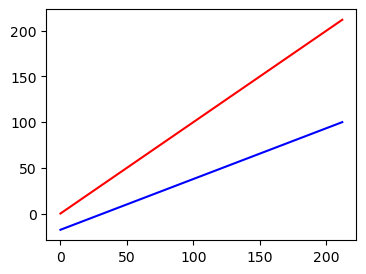

In [64]:
fig, ax = plt.subplots(1,1,figsize=(4,3))
f_temps = np.linspace(0, 212, 100)
c_temps = (5/9) * (f_temps - 32)
plt.plot(f_temps, f_temps, 'r',   
         f_temps, c_temps, 'b');

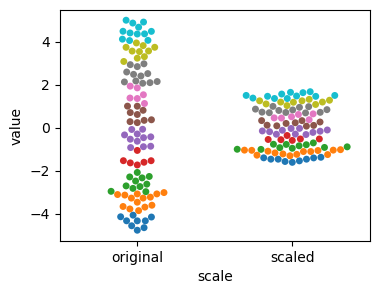

In [65]:
fig, ax = plt.subplots(1,1,figsize=(4,3))
original = np.random.uniform(-5, 5, 100)

scaled = (skpre.StandardScaler()
               .fit_transform(original.reshape(-1,1))[:,0])
bins = np.floor(original).astype(np.uint8) + 5

df = pd.DataFrame({'original':original,
                   'scaled':scaled,
                   'hue':bins})
df = pd.melt(df, id_vars='hue', var_name='scale')

sns.swarmplot(x='scale', y='value', hue='hue', data=df).legend_.remove()

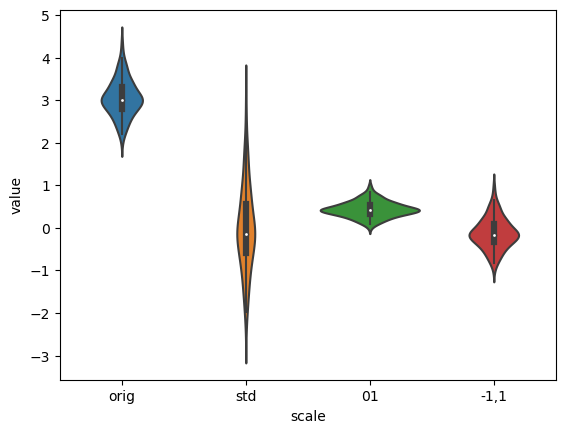

In [66]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

df = pd.DataFrame({'orig':iris_df['sepal width']})

scalers = [('std', skpre.StandardScaler()),
           ('01' , skpre.MinMaxScaler()),
           ('-1,1', skpre.MinMaxScaler((-1,1)))]

for name, scaler in scalers:
     # ugly:  [[]] to keep 2D for sklearn
     #        reshape(-1) to go back to 1-D for seaborn  :(
    df[name] = scaler.fit_transform(df[['orig']]).reshape(-1)

df = pd.melt(df, var_name='scale')
sns.violinplot(x='scale', y='value', data=df);

In [67]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]
display(iris_df.iloc[[0,50,100]])

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
100,6.3,3.3,6.0,2.5,virginica


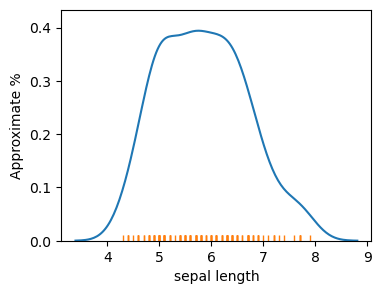

In [68]:
plt.subplots(1,1,figsize=(4,3))
ax = sns.kdeplot(data=iris_df, x="sepal length")
sns.rugplot(data=iris_df, x="sepal length")
ax.set_ylabel("Approximate %");

In [69]:
column = iris_df[['sepal length']] 
col_mean = column.mean().values    

both = column.copy()
both['> Mean'] = skpre.binarize(column, threshold=col_mean).astype(bool)

print('Column Mean:', col_mean)
display(both.iloc[[0,50,100]])

Column Mean: [5.84333333]


,sepal length,> Mean
0,5.1,False
50,7.0,True
100,6.3,True


In [70]:
sep_len_series = iris_df['sepal length']
breaks = [sep_len_series.mean(), 
          sep_len_series.max()]

print(pd.cut(sep_len_series, breaks).cat.codes[[0, 50, 100]])

0     -1
50     0
100    0
dtype: int8


In [71]:
np.where(column > column.mean(), True, False)[[0,50,100]]

array([[False],
       [ True],
       [ True]])

In [72]:
new_iris_df = pd.DataFrame(iris_df, columns=['petal length', 
                                             'petal width', 
                                             'species'])

new_iris_df.columns = pd.MultiIndex([['input ftrs', 'target ftr'],
                                      new_iris_df.columns], 
                                     [[1, 0, 0], [0,1,2]])

new_iris_df.sort_index(axis='columns', inplace=True)
display(new_iris_df.iloc[[0,50,100]])

input ftrs               target ftr
    petal width     species petal length
0           0.2      setosa          1.4
50          1.4  versicolor          4.7
100         2.5   virginica          6.0

In [73]:
print("Numerical categories:",
      iris.target[[0, 50, 100]], sep='\n')

sparse = (skpre.OneHotEncoder(categories='auto')
               .fit_transform(iris.target.reshape(-1,1)))

print("One-hot coding:", 
      sparse[[0,50,100]].todense(), sep="\n")

Numerical categories:
[0 1 2]
One-hot coding:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [74]:
encoded = pd.get_dummies(iris_df, prefix="is") 
encoded.iloc[[0,50,100]]

,sepal length,sepal width,petal length,petal width,is_setosa,is_versicolor,is_virginica
0,5.1,3.5,1.4,0.2,1,0,0
50,7.0,3.2,4.7,1.4,0,1,0
100,6.3,3.3,6.0,2.5,0,0,1


In [75]:
encoded = pd.get_dummies(iris_df, prefix="is", drop_first=True) 
encoded.iloc[[0,50,100]]

,sepal length,sepal width,petal length,petal width,is_versicolor,is_virginica
0,5.1,3.5,1.4,0.2,0,0
50,7.0,3.2,4.7,1.4,1,0
100,6.3,3.3,6.0,2.5,0,1


In [76]:
import patsy
import patsy.contrasts as pc 
levels = iris.target_names
coding = (pc.Treatment(reference=0)
             .code_with_intercept(list(levels)))
print(coding)

ContrastMatrix(array([[1., 0., 0.],
                      [0., 1., 0.],
                      [0., 0., 1.]]),
               ['[setosa]', '[versicolor]', '[virginica]'])


In [77]:
encoded = patsy.dmatrix('species-1',
                       iris_df,
                       return_type='dataframe')

display(encoded.iloc[[0,50,100]])

,species[setosa],species[versicolor],species[virginica]
0,1.0,0.0,0.0
50,0.0,1.0,0.0
100,0.0,0.0,1.0


In [78]:
encoded = patsy.dmatrix('species',
                       iris_df,
                       return_type='dataframe')
display(encoded.iloc[[0,50,100]])

,Intercept,species[T.versicolor],species[T.virginica]
0,1.0,0.0,0.0
50,1.0,1.0,0.0
100,1.0,0.0,1.0


In [79]:
import pandas as pd

pet_data = pd.DataFrame({'pet': ['cat', 'cat', 'dog'],
                         'cost': [20.0, 25.0, 40.0]})
pet_df = pd.get_dummies(pet_data)
display(pet_df)

,cost,pet_cat,pet_dog
0,20.0,1,0
1,25.0,1,0
2,40.0,0,1


In [80]:
def pretty_coeffs(sk_lr_model, ftr_names):
    
    lr_coeffs = pd.DataFrame(sk_lr_model.coef_,
                            columns=ftr_names,
                            index=['Coeff'])
    lr_coeffs['intercept'] = sk_lr_model.intercept_
    return lr_coeffs

In [81]:
sk_tgt = pet_df['cost'].values.reshape(-1,1)
sk_ftrs = pet_df.drop('cost', axis='columns')

sk_model = (linear_model.LinearRegression(fit_intercept=False)
                        .fit(sk_ftrs, sk_tgt))

display(pretty_coeffs(sk_model, sk_ftrs.columns))

,pet_cat,pet_dog,intercept
Coeff,22.5,40.0,0.0


In [82]:
import statsmodels as sm
import statsmodels.formula.api as smf

In [83]:
formula = 'cost ~ pet - 1'
sm_model = smf.ols(formula, data=pet_data).fit()
display(pd.DataFrame(sm_model.params).T)

,pet[cat],pet[dog]
0,22.5,40.0


In [84]:
sk_tgt = pet_df['cost'].values.reshape(-1,1)
sk_ftrs = pet_df.drop('cost', axis='columns')
sk_model = (linear_model.LinearRegression()
                        .fit(sk_ftrs, sk_tgt))

display(pretty_coeffs(sk_model, sk_ftrs.columns))

,pet_cat,pet_dog,intercept
Coeff,-8.75,8.75,31.25


In [85]:
pet_data_p1 = pet_data.copy()
pet_data_p1['ones'] = 1.0

formula = 'cost ~ (pet - 1) + ones'
sm_model = smf.ols(formula, data=pet_data_p1).fit()
display(pd.DataFrame(sm_model.params).T)

,pet[cat],pet[dog],ones
0,1.666667,19.166667,20.833333


In [86]:
df = pd.DataFrame({'predicted_sk' : sk_model.predict(sk_ftrs)[:,0],
                  'predicted_sm' : sm_model.predict(pet_data_p1),
                  'actual'       : sk_tgt[:,0]})
display(df)

,predicted_sk,predicted_sm,actual
0,22.5,22.5,20.0
1,22.5,22.5,25.0
2,40.0,40.0,40.0


In [87]:
display(pet_data_p1)

,pet,cost,ones
0,cat,20.0,1.0
1,cat,25.0,1.0
2,dog,40.0,1.0


In [88]:
print('pet - 1 coding')
print(patsy.dmatrix('pet - 1', data=pet_data_p1))

pet - 1 coding
[[1. 0.]
 [1. 0.]
 [0. 1.]]


In [89]:
full_coding = patsy.dmatrix('pet - 1',
                           data=pet_data_p1,
                           return_type='dataframe')
display(pd.DataFrame(full_coding.sum(axis='columns')))

,0
0,1.0
1,1.0
2,1.0


In [90]:
xor_data = [[0,0,0],
           [0,1,1],
           [1,0,1],
           [1,1,0]]

xor_df = pd.DataFrame(xor_data,
                     columns=['x1', 'x2', 'tgt'])

display(xor_df)

,x1,x2,tgt
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [94]:
model = linear_model.LogisticRegression().fit(xor_df[['x1', 'x2']],
                                              xor_df['tgt'])

model.predict(xor_df[['x1', 'x2']])

array([0, 0, 0, 0])

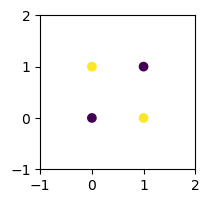

In [95]:
fig, ax = plt.subplots(1,1,figsize=(2,2))
ax.scatter('x1', 'x2', data=xor_df, c='tgt')
ax.set_xlim(-1, 2)
ax.set_ylim(-1, 2);

In [96]:
xor_df['new'] = (-1)**xor_df['x1'] * (-1)**xor_df['x2']
xor_df

,x1,x2,tgt,new
0,0,0,0,1
1,0,1,1,-1
2,1,0,1,-1
3,1,1,0,1


In [97]:
model = linear_model.LogisticRegression().fit(xor_df[['new']], 
                                              xor_df['tgt'])
model.predict(xor_df[['new']])

array([0, 1, 1, 0])

In [98]:
quad_inters = skpre.PolynomialFeatures(degree=2,
                                       interaction_only=True,
                                       include_bias=False)
subset = iris_df.loc[[0, 50, 100], ['sepal length', 'sepal width']]
new_terms = pd.DataFrame(quad_inters.fit_transform(subset), 
                         index=[0, 50, 100])
new_terms.set_axis(['sep length', 'sep width', 'sep area'], 
                   axis=1, inplace=True)
display(new_terms)

,sep length,sep width,sep area
0,5.1,3.5,17.85
50,7.0,3.2,22.40
100,6.3,3.3,20.79


In [99]:
design_df = patsy.dmatrix("Q('sepal length'):Q('sepal width') - 1",
                         data=iris_df.iloc[[0,50, 100]],
                         return_type='dataframe')
design_df

,Q('sepal length'):Q('sepal width')
0,17.85
50,22.40
100,20.79


In [100]:
sepal_area = iris_df['sepal length'] * iris_df['sepal width']
petal_area = iris_df['petal length'] * iris_df['petal width']

iris_df['big_sepal'] = sepal_area > sepal_area.median()
iris_df['big_petal'] = petal_area > petal_area.median()
display(iris_df.iloc[[0,50,100]])

,sepal length,sepal width,petal length,petal width,species,big_sepal,big_petal
0,5.1,3.5,1.4,0.2,setosa,True,False
50,7.0,3.2,4.7,1.4,versicolor,True,True
100,6.3,3.3,6.0,2.5,virginica,True,True


In [101]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]

area_df = pd.DataFrame({"sepal_area" : iris_df['sepal length'] * 
                                       iris_df['sepal width'],
                        "petal_area" : iris_df['petal length'] * 
                                       iris_df['petal width']})

In [102]:
def median_big_small(d):
    return d > np.median(d)

transformer = skpre.FunctionTransformer(median_big_small)
res = transformer.fit_transform(area_df)

print("Large areas as compared to median?")
print(res.iloc[[0, 50, 100]])

Large areas as compared to median?
     sepal_area  petal_area
0          True       False
50         True       False
100        True        True


In [103]:
from sklearn.base import TransformerMixin

class Median_Big_Small(TransformerMixin):
    def fit(self, ftrs, tgt=None):
        self.medians = np.median(ftrs)
        return self
    def transform(self, ftrs, tgt=None):
        return ftrs > self.medians

In [104]:
training, testing = skms.train_test_split(area_df)

transformer = Median_Big_Small()
train_xform = transformer.fit_transform(training)
test_xform  = transformer.transform(testing)

print('train:')
display(train_xform[:3])
print('test:')
display(test_xform[ :3])

train:


,sepal_area,petal_area
146,True,False
41,False,False
54,True,False


test:


,sepal_area,petal_area
140,True,True
138,True,False
15,True,False


In [107]:
x = np.linspace(1,10,50)
n1 = np.random.normal(size=x.shape)

comparison = pd.DataFrame({"x"  : x,
                           "d1" : 2*x    + 5 + n1,
                           "d2" : 2*x**2 + 5 + n1})

comparison['x'] = x
melted = pd.melt(comparison, id_vars=['x'])

/Users/sydniemarfione/opt/anaconda3/lib/python3.9/site-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


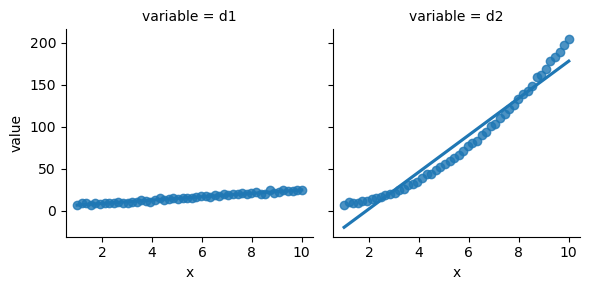

In [108]:
sns.lmplot(data=melted, x='x', y='value',
           col='variable', ci=None, size=3);

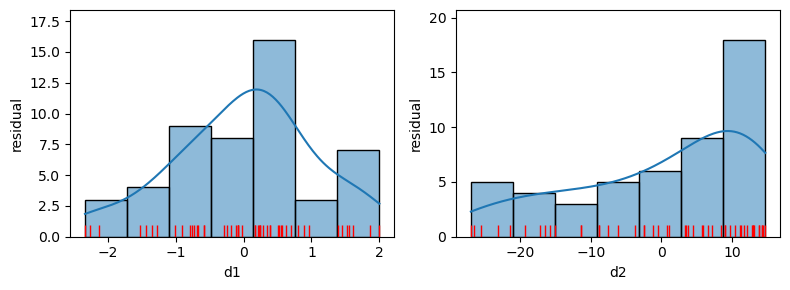

In [109]:
fig, axes = plt.subplots(1,2,figsize=(8,3))
for ax, variable in zip(axes, ['d1', 'd2']):
    predicted = (linear_model.LinearRegression()
                             .fit(comparison[['x']],
                                  comparison[[variable]])
                             .predict(comparison[['x']])).reshape(-1)
    actual = comparison[variable]

    sns.histplot(predicted - actual, ax=ax, kde=True)
    sns.rugplot(predicted - actual, ax=ax, height=.05, color='red')
    
    ax.set_xlabel(variable)
    ax.set_ylabel('residual')
fig.tight_layout();

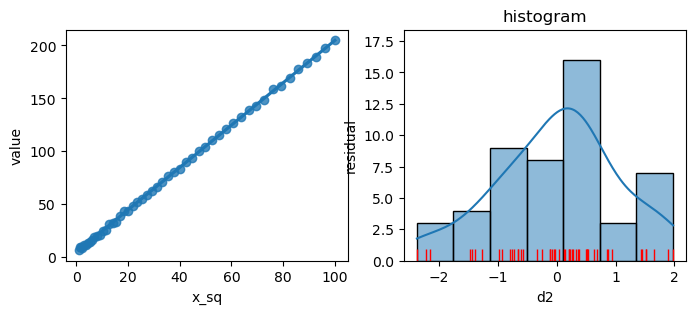

In [110]:
magic = pd.DataFrame({"d2"   : 2*x**2+5+n1,
                      "x_sq" : x**2})

melted = pd.melt(magic, id_vars=['x_sq'])

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8,3))
sns.regplot(x='x_sq', y='value', 
            data=melted, ci=None, ax=ax1)

predicted = (linear_model.LinearRegression()
                         .fit(magic[['x_sq']],
                              magic[['d2']])
                         .predict(magic[['x_sq']])).reshape(-1)
actual = magic['d2']
sns.histplot(predicted - actual, ax=ax2, kde=True)
sns.rugplot(predicted - actual, ax=ax2, height=.05, color='red')


ax2.set_title('histogram')
ax2.set_ylabel('residual');

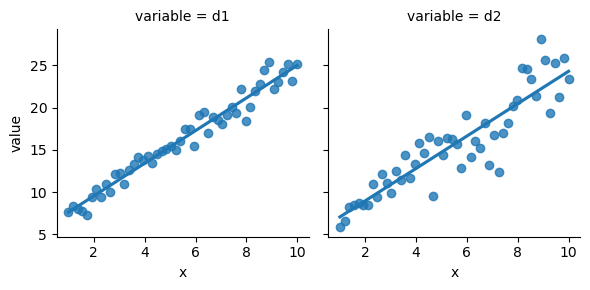

In [112]:
x = np.linspace(1,10,50)

n1 = np.random.normal(size=x.shape)
n2 = 0.5*x*np.random.normal(size=x.shape)

comparison = pd.DataFrame({"x"  : x,
                           "d1" : 2*x + 5 + n1,
                           "d2" : 2*x + 5 + n2})

melted = pd.melt(comparison, id_vars=['x'])
sns.lmplot(data=melted, x='x', y='value', 
           col='variable', ci=None, height=3);

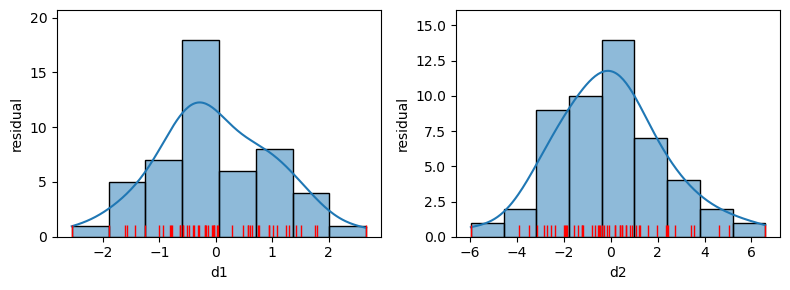

In [113]:
fig, axes = plt.subplots(1,2,figsize=(8,3))
for ax, variable in zip(axes, ['d1', 'd2']):
    predicted = (linear_model.LinearRegression()
                             .fit(comparison[['x']],
                                  comparison[[variable]])
                             .predict(comparison[['x']])).reshape(-1)
    actual = comparison[variable]
    
    sns.histplot(predicted - actual, ax=ax, kde=True)
    sns.rugplot(predicted - actual, ax=ax, height=.05, color='red')

    ax.set_xlabel(variable)
    ax.set_ylabel('residual')

fig.tight_layout();

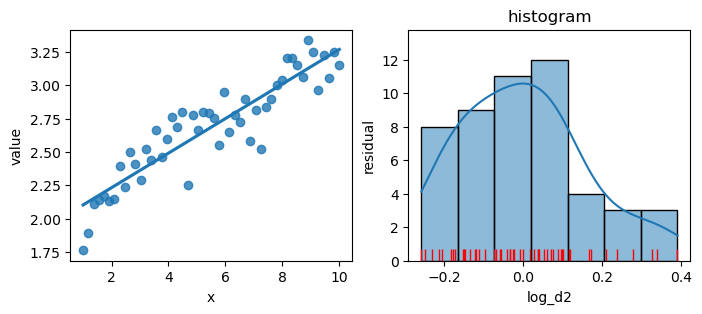

In [114]:
magic = pd.DataFrame({"log_d2" : np.log(comparison['d2']),
                      "x"      : x})

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8,3))

melted = pd.melt(magic, id_vars=['x'])
sns.regplot(data=melted, x='x', y='value', 
            ci=None, ax=ax1)

predicted = (linear_model.LinearRegression()
                         .fit(magic[['x']],
                              magic[['log_d2']])
                         .predict(magic[['x']])).reshape(-1)
actual = magic['log_d2']

sns.histplot(predicted-actual, ax=ax2, kde=True)
sns.rugplot(predicted-actual, ax=ax2, height=.05, color='red')

ax2.set_title('histogram')
ax2.set_ylabel('residual');